In [1]:
#importação das bibliotecas necessárias
import pandas as pd
import numpy as np 
import pydot
from IPython.display import Image
import seaborn as sb
import time
from datetime import date
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.pyplot import MultipleLocator
import joblib
from scipy.sparse import csr_matrix
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from matplotlib import rcParams
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
#importação dos CSVs
animedf = pd.read_csv("anime.csv")
animesynopdf = pd.read_csv("anime_with_synopsis.csv")
animelistdf = pd.read_csv("animelist.csv")
animestatusdf = pd.read_csv("watching_status.csv")


In [5]:
#Cria DataFrame com a lista de animes e sinopse.
animecompletodf = animedf.copy()
animecompletodf.merge(animesynopdf, left_on='MAL_ID', right_on='MAL_ID')

,MAL_ID,Name_x,Score_x,Genres_x,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Name_y,Score_y,Genres_y,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,5805.0,1877.0,577.0,221.0,109.0,379.0,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,15376.0,5838.0,1965.0,664.0,316.0,533.0,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,5709.0,2920.0,1083.0,353.0,164.0,131.0,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,1068.0,634.0,265.0,83.0,50.0,27.0,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16209,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",No synopsis information has been added to this...
16210,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",ko is a typical high school student whose life...
16211,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Sequel to Higurashi no Naku Koro ni Gou .
16212,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",New Yama no Susume anime.


In [7]:
#Tratamento de Outliers - Filtra as animações sem avaliação
animecompletodf = animecompletodf[animecompletodf["Popularity"] != 0]

In [8]:
#Visão de Animações por popularidade - Insights

In [9]:
animecompletodf.sort_values('Popularity')[['Name','Type','Episodes', 'Aired', 'Genres', 'Popularity']].head()

,Name,Type,Episodes,Aired,Genres,Popularity
1393,Death Note,TV,37,"Oct 4, 2006 to Jun 27, 2007","Mystery, Police, Psychological, Supernatural, ...",1
7449,Shingeki no Kyojin,TV,25,"Apr 7, 2013 to Sep 29, 2013","Action, Military, Mystery, Super Power, Drama,...",2
3971,Fullmetal Alchemist: Brotherhood,TV,64,"Apr 5, 2009 to Jul 4, 2010","Action, Military, Adventure, Comedy, Drama, Ma...",3
6614,Sword Art Online,TV,25,"Jul 8, 2012 to Dec 23, 2012","Action, Game, Adventure, Romance, Fantasy",4
10451,One Punch Man,TV,12,"Oct 5, 2015 to Dec 21, 2015","Action, Sci-Fi, Comedy, Parody, Super Power, S...",5


In [10]:
#Cria DataFrame limitando as colunas
#Cria DataFrame explodindo o genero

In [11]:
animecompletogenerodf = animecompletodf[['MAL_ID', 'Name', 'Score', 'Episodes','Genres','Source','Type','Studios']].copy()
animecompletogenerodf['Genero_Explode'] = animecompletogenerodf['Genres'].str.split(',')
animecompletogenerodf = animecompletogenerodf.explode('Genero_Explode')
animecompletogenerodf['Genero_Explode'] = animecompletogenerodf['Genero_Explode'].str.strip()


In [12]:
animecompletogenerodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50254 entries, 0 to 17561
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MAL_ID          50254 non-null  int64 
 1   Name            50254 non-null  object
 2   Score           50254 non-null  object
 3   Episodes        50254 non-null  object
 4   Genres          50254 non-null  object
 5   Source          50254 non-null  object
 6   Type            50254 non-null  object
 7   Studios         50254 non-null  object
 8   Genero_Explode  50254 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.8+ MB


In [13]:
#Cria Dataframe Unificando as avaliações de usuários, episódios assistidos e se finalizaram o anime

In [14]:
avaliacoesdf = animelistdf.copy()
avaliacoesdf = avaliacoesdf.merge(animestatusdf, left_on='watching_status', right_on='status')

In [15]:
#DataFrame que unifica a lista de todos os animes, com genero explodido, junto à nota dos usuarios.

In [16]:

animetotaldf = animecompletogenerodf.copy()
animetotaldf= animetotaldf.merge(avaliacoesdf, left_on='MAL_ID', right_on='anime_id')


In [17]:
animetotaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475056009 entries, 0 to 475056008
Data columns (total 16 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   MAL_ID            int64 
 1   Name              object
 2   Score             object
 3   Episodes          object
 4   Genres            object
 5   Source            object
 6   Type              object
 7   Studios           object
 8   Genero_Explode    object
 9   user_id           int64 
 10  anime_id          int64 
 11  rating            int64 
 12  watching_status   int64 
 13  watched_episodes  int64 
 14  status            int64 
 15   description      object
dtypes: int64(7), object(9)
memory usage: 60.2+ GB


In [18]:
#Pre-processamento - Tratamento do numero de episódios de series que ainda estão sendo exibidas

In [19]:
animetotaldf["Episodes"] = animetotaldf["Episodes"].replace(["Unknown"],0)
animetotaldf["Score"] = animetotaldf["Score"].replace(["Unknown"],0)
animetotaldf["watched_episodes"] = animetotaldf["watched_episodes"].astype('float')
animetotaldf["Episodes"] = animetotaldf["Episodes"].astype('float')
animetotaldf["Score"] = animetotaldf["Score"].astype('float')

In [20]:
#Recalculo de rating de anime baseado em novos parametros (Usuário avaliou e assistiu ao menos 50% do anime e usuários que não avaliaram (score 0).)

In [21]:
animetotaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475056009 entries, 0 to 475056008
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MAL_ID            int64  
 1   Name              object 
 2   Score             float64
 3   Episodes          float64
 4   Genres            object 
 5   Source            object 
 6   Type              object 
 7   Studios           object 
 8   Genero_Explode    object 
 9   user_id           int64  
 10  anime_id          int64  
 11  rating            int64  
 12  watching_status   int64  
 13  watched_episodes  float64
 14  status            int64  
 15   description      object 
dtypes: float64(3), int64(6), object(7)
memory usage: 60.2+ GB


In [22]:

animetotaldf = animetotaldf[animetotaldf["rating"] != 0]
animetotaldf = animetotaldf[animetotaldf["watched_episodes"] / animetotaldf["Episodes"] > 0.5]


In [23]:
#Cria novo dataframe para classificar animes segundo o novo rating

In [24]:

novoratingdf = animetotaldf[['Name','rating']].copy()
novoratingdf= novoratingdf.groupby(by='Name').mean()
novoratingdf.sort_values(by=['rating'], inplace=True,ascending=False)

In [25]:
novoratingdf.head(200)

,rating
Name,
Momotarou no Koutsuu Anzen Kyoushitsu,10.000000
Nangoku Shounen Papuwa-kun: Hoshi Kudaru Yoru ni Aimashou,10.000000
Osakini Douzo Arigatou,10.000000
Nendjuugyouji Animation Series,10.000000
Paniponi,10.000000
...,...
Nichijou,8.462478
Gintama Movie 1: Shinyaku Benizakura-hen,8.462003
Shingeki no Kyojin Season 3,8.457777


In [26]:
################################################################################################

In [27]:
#Cria dataframe animesynop para unificar o identificador da animação com o dataframe de sinopses. 

In [28]:

animeiddf = animedf['MAL_ID'].copy()
animesynopdf = pd.merge(animeiddf, animesynopdf, on='MAL_ID', how='left').fillna('').astype(str)


In [29]:
animesynopdf.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [30]:
#Cria um TF IDF para criar uma relação de palavras mais comuns tentando identificar as palavras mais interessantes

In [31]:
tfv = TfidfVectorizer(min_df=3, max_features=None,
                      strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
                      ngram_range=(1, 3),
                      stop_words = 'english')

synopsis_originaldf = animesynopdf['sypnopsis']
synopsis_vector_tf_idf = tfv.fit_transform(synopsis_originaldf)
synopsis_vector_tf_idf.shape

(17562, 38694)

In [32]:
# todense - converte em matriz

In [33]:

matriz_anime = np.concatenate((synopsis_vector_tf_idf.todense()), axis=1)
matriz_anime = synopsis_vector_tf_idf.todense()
matriz_anime.shape


(17562, 38694)

In [34]:
#Cria dataframe ára aplicação de KNN nos dados da matriz. 

In [35]:
cb_model_knn = NearestNeighbors(metric='cosine', n_neighbors=9)
cb_model_knn.fit(csr_matrix(matriz_anime))

NearestNeighbors(metric='cosine', n_neighbors=9)

In [36]:
#função para fazer a recomendação do anime por sinopse
def recomendar_por_sinopse(indice):
    distances, indices = cb_model_knn.kneighbors(matriz_anime[indice,:].reshape(1, -1), n_neighbors=11)
    resultado = []
    for i in range(0, len(distances.flatten())):
        index = indices.flatten()[i]
        if index == indice:
            continue
        resultado.append(animedf.iloc[index])
    return pd.DataFrame(resultado)

In [37]:
#função para fazer a busca do anime por palavra chave
def busca_anime(palavra_chave):
    query1 = animedf['Japanese name'].str.contains(palavra_chave, case=False)
    query2 = animedf['English name'].str.contains(palavra_chave, case=False)
    print(animedf[query1 | query2][['Name', 'Japanese name']].head(20))
    return animedf[query1 | query2].head(1).index

In [38]:
# busca similares ao anime pelo nome

In [39]:
recomendar_por_sinopse(busca_anime('Neon Genesis Evangelion')) 

                                              Name  \
20                         Neon Genesis Evangelion   
21        Neon Genesis Evangelion: Death & Rebirth   
22  Neon Genesis Evangelion: The End of Evangelion   

                           Japanese name  
20                           新世紀エヴァンゲリオン  
21                  新世紀エヴァンゲリオン劇場版 シト新生  
22  新世紀エヴァンゲリオン劇場版 THE END OF EVANGELION  


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
22,32,Neon Genesis Evangelion: The End of Evangelion,8.51,"Sci-Fi, Dementia, Psychological, Drama, Mecha",Neon Genesis Evangelion:The End of Evangelion,新世紀エヴァンゲリオン劇場版 THE END OF EVANGELION,Movie,1,"Jul 19, 1997",Unknown,...,127081.0,95821.0,77593.0,41261.0,16444.0,7057.0,4493.0,2279.0,1941.0,2264.0
2541,2759,Evangelion: 1.0 You Are (Not) Alone,8.07,"Action, Sci-Fi, Psychological, Drama, Mecha",Evangelion:1.0 You Are (Not) Alone,ヱヴァンゲリヲン新劇場版:序,Movie,1,"Sep 1, 2007",Unknown,...,31374.0,52095.0,72936.0,42268.0,12920.0,4679.0,1541.0,563.0,360.0,535.0
21,31,Neon Genesis Evangelion: Death & Rebirth,7.45,"Drama, Mecha, Psychological, Sci-Fi",Neon Genesis Evangelion:Death & Rebirth,新世紀エヴァンゲリオン劇場版 シト新生,Movie,1,"Mar 15, 1997",Unknown,...,13516.0,15245.0,23683.0,25396.0,12694.0,6313.0,2636.0,1042.0,654.0,737.0
3279,3785,Evangelion: 3.0 You Can (Not) Redo,7.59,"Action, Sci-Fi, Psychological, Drama, Mecha",Evangelion:3.0 You Can (Not) Redo,ヱヴァンゲリヲン新劇場版:Q,Movie,1,"Nov 17, 2012",Unknown,...,19467.0,26679.0,40265.0,33154.0,15146.0,6698.0,4506.0,2016.0,960.0,876.0
17297,43745,Attack Zero x Evangelion,5.3,"Music, Slice of Life",Unknown,花王 アタックZERO エヴァンゲリオン,ONA,1,"Nov 2, 2020",Unknown,...,14.0,7.0,12.0,25.0,60.0,106.0,22.0,22.0,22.0,16.0
3513,4130,Petit Eva: Evangelion@School,5.64,"Comedy, Parody, School",Unknown,ぷちえう゛ぁ,ONA,24,"Mar 20, 2007 to Mar 11, 2009",Unknown,...,479.0,375.0,858.0,1578.0,1755.0,1451.0,824.0,544.0,491.0,717.0
3278,3784,Evangelion: 2.0 You Can (Not) Advance,8.35,"Action, Sci-Fi, Psychological, Drama, Mecha",Evangelion:2.0 You Can (Not) Advance,ヱヴァンゲリヲン新劇場版:破,Movie,1,"Jul 27, 2009",Unknown,...,43399.0,60134.0,57609.0,28335.0,9590.0,3718.0,1726.0,719.0,405.0,740.0
11489,32739,JRA Hokan Keikaku,4.74,"Action, Mecha",Unknown,JRA補完計画,ONA,3,"Jun 15, 2012 to Oct 21, 2012",Unknown,...,36.0,12.0,16.0,43.0,76.0,195.0,139.0,86.0,61.0,64.0
10826,31115,Schick x Evangelion,6.06,"Comedy, Parody",Unknown,Schick × エヴァンゲリオン,Special,2,"May 11, 2015",Unknown,...,728.0,75.0,122.0,297.0,416.0,532.0,245.0,185.0,166.0,211.0
4751,6795,Genius Party Beyond,7.23,"Sci-Fi, Music, Dementia, Fantasy",Unknown,ジーニアスパーティービヨンド,Movie,5,"Oct 11, 2008",Unknown,...,579.0,853.0,1746.0,1980.0,1023.0,492.0,177.0,89.0,39.0,36.0


In [40]:
recomendar_por_sinopse(busca_anime('Darker Than Black')) 

                                                   Name  \
1845              Darker than Black: Kuro no Keiyakusha   
3538  Darker than Black: Kuro no Keiyakusha - Sakura...   
4649               Darker than Black: Ryuusei no Gemini   
4979       Darker than Black: Kuro no Keiyakusha Gaiden   

                           Japanese name  
1845           Darker than BLACK -黒の契約者-  
3538  DARKER THAN BLACK -黒の契約者- 桜の花の満開の下  
4649             DARKER THAN BLACK 流星の双子  
4979         Darker than BLACK -黒の契約者 外伝  


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
4979,7338,Darker than Black: Kuro no Keiyakusha Gaiden,7.97,"Action, Mystery, Sci-Fi, Super Power",Unknown,Darker than BLACK -黒の契約者 外伝,Special,4,"Jan 27, 2010 to Jul 21, 2010",Unknown,...,14473.0,27544.0,42461.0,26980.0,8827.0,3073.0,891.0,258.0,132.0,134.0
4649,6573,Darker than Black: Ryuusei no Gemini,7.48,"Action, Sci-Fi, Mystery, Super Power",Darker than Black:Gemini of the Meteor,DARKER THAN BLACK 流星の双子,TV,12,"Oct 9, 2009 to Dec 25, 2009",Fall 2009,...,17985.0,31999.0,55708.0,52886.0,24419.0,10369.0,5593.0,2013.0,922.0,696.0
361,385,Gilgamesh,6.65,"Drama, Fantasy, Sci-Fi, Supernatural",Gilgamesh,ギルガメッシュ,TV,26,"Nov 2, 2003 to Mar 18, 2004",Fall 2003,...,557.0,935.0,1724.0,2427.0,1782.0,1260.0,791.0,357.0,236.0,176.0
1843,2023,Bakuen Campus Guardress,6.09,"Action, Comedy, Supernatural, School, Shounen",Unknown,爆炎CAMPUSガードレス,OVA,4,"May 27, 1994 to Nov 25, 1994",Unknown,...,32.0,43.0,94.0,191.0,210.0,133.0,92.0,44.0,14.0,10.0
1213,1343,Violence Jack: Hell's Wind-hen,5.48,"Action, Drama, Horror",Violence Jack:Hell's Wind,バイオレンス ジャック 〜ヘルスウインド編〜,OVA,1,"Nov 9, 1990",Unknown,...,120.0,120.0,267.0,570.0,756.0,695.0,350.0,264.0,224.0,123.0
5861,9675,Kami nomi zo Shiru Sekai: Flag 0,6.91,"Comedy, Shounen, Supernatural",The World God Only Knows:Flag 0,神のみぞ知るセカイ:Flag 0,OVA,1,"Sep 17, 2010",Unknown,...,2244.0,2383.0,4415.0,7834.0,5923.0,3084.0,775.0,326.0,181.0,148.0
3538,4182,Darker than Black: Kuro no Keiyakusha - Sakura...,7.57,"Sci-Fi, Comedy, Parody",Unknown,DARKER THAN BLACK -黒の契約者- 桜の花の満開の下,Special,1,"Mar 26, 2008",Unknown,...,6294.0,10373.0,20651.0,21561.0,8209.0,3057.0,771.0,235.0,118.0,100.0
11251,32152,Closers: Side Blacklambs,6.4,"Game, Fantasy",Closers:Side Blacklambs,클로저스:SIDE BLACKLAMBS,ONA,12,"Dec 23, 2016 to ?",Unknown,...,178.0,92.0,177.0,331.0,294.0,186.0,98.0,36.0,31.0,47.0
106,127,Gate Keepers,6.96,"Action, Sci-Fi, Comedy, Fantasy, Mecha, Shounen",Unknown,ゲートキーパーズ,TV,24,"Apr 3, 2000 to Sep 18, 2000",Spring 2000,...,368.0,734.0,1738.0,2740.0,1575.0,850.0,289.0,121.0,54.0,37.0
9897,28907,"Gate: Jieitai Kanochi nite, Kaku Tatakaeri",7.74,"Action, Adventure, Fantasy, Military",GATE,GATE（ゲート）自衛隊 彼の地にて、斯く戦えり,TV,12,"Jul 4, 2015 to Sep 19, 2015",Summer 2015,...,33144.0,64199.0,112250.0,80259.0,29438.0,12892.0,5895.0,2585.0,1405.0,1031.0


In [41]:
recomendar_por_sinopse(busca_anime('Dragon Ball Z')) 

                                                   Name  \
734                                       Dragon Ball Z   
809     Dragon Ball Z Movie 01: Ora no Gohan wo Kaese!!   
810   Dragon Ball Z Movie 02: Kono Yo de Ichiban Tsu...   
811   Dragon Ball Z Movie 03: Chikyuu Marugoto Chouk...   
812   Dragon Ball Z Movie 04: Super Saiyajin da Son ...   
813   Dragon Ball Z Movie 05: Tobikkiri no Saikyou t...   
814   Dragon Ball Z Movie 06: Gekitotsu!! 100-oku Po...   
815   Dragon Ball Z Movie 07: Kyokugen Battle!! Sand...   
816   Dragon Ball Z Movie 08: Moetsukiro!! Nessen, R...   
817   Dragon Ball Z Movie 09: Ginga Girigiri!! Bucch...   
818   Dragon Ball Z Movie 10: Kiken na Futari! Super...   
819   Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...   
820   Dragon Ball Z Movie 12: Fukkatsu no Fusion!! G...   
821   Dragon Ball Z Movie 13: Ryuuken Bakuhatsu!! Go...   
890   Dragon Ball Z Special 2: Zetsubou e no Hankou!...   
891   Dragon Ball Z Special 1: Tatta Hitori no Saish... 

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
4426,6033,Dragon Ball Kai,7.73,"Action, Adventure, Comedy, Fantasy, Martial Ar...",Dragon Ball Z Kai,ドラゴンボール改,TV,97,"Apr 5, 2009 to Mar 27, 2011",Spring 2009,...,23094.0,27932.0,47169.0,40740.0,16590.0,7320.0,2752.0,1096.0,640.0,772.0
820,905,Dragon Ball Z Movie 12: Fukkatsu no Fusion!! G...,7.55,"Action, Adventure, Comedy, Fantasy, Sci-Fi, Sh...",Dragon Ball Z:Fusion Reborn,ドラゴンボールZ 復活のフュージョン!!悟空とベジータ,Movie,1,"Mar 4, 1995",Unknown,...,8573.0,10406.0,19355.0,18814.0,8147.0,3871.0,1190.0,451.0,180.0,167.0
201,225,Dragon Ball GT,6.48,"Action, Sci-Fi, Adventure, Comedy, Super Power...",Dragon Ball GT,ドラゴンボールGT,TV,64,"Feb 7, 1996 to Nov 19, 1997",Winter 1996,...,22680.0,23836.0,44045.0,74704.0,67689.0,42801.0,26843.0,11272.0,5903.0,4003.0
9326,25389,"Dragon Ball Z Movie 15: Fukkatsu no ""F""",7.11,"Action, Adventure, Comedy, Super Power, Martia...",Dragon Ball Z:Resurrection 'F',ドラゴンボールZ 復活の「F」,Movie,1,"Apr 18, 2015",Unknown,...,6125.0,8870.0,18792.0,24092.0,12227.0,5730.0,2938.0,1392.0,740.0,482.0
7186,14837,Dragon Ball Z Movie 14: Kami to Kami,7.41,"Action, Adventure, Super Power, Martial Arts, ...",Dragon Ball Z:Battle of Gods,ドラゴンボールZ 神と神,Movie,1,"Mar 30, 2013",Unknown,...,10005.0,15073.0,28504.0,29220.0,13014.0,5632.0,2695.0,1173.0,583.0,357.0
200,223,Dragon Ball,8.0,"Adventure, Comedy, Fantasy, Martial Arts, Shou...",Dragon Ball,ドラゴンボール,TV,153,"Feb 26, 1986 to Apr 12, 1989",Winter 1986,...,88245.0,89656.0,134427.0,108758.0,39962.0,14806.0,3942.0,1392.0,834.0,1204.0
10623,30694,Dragon Ball Super,7.42,"Action, Adventure, Comedy, Super Power, Martia...",Dragon Ball Super,ドラゴンボール超（スーパー）,TV,131,"Jul 5, 2015 to Mar 25, 2018",Summer 2015,...,42638.0,46847.0,78067.0,81751.0,42032.0,20174.0,10686.0,5314.0,3235.0,3312.0
807,892,Dragon Ball Movie 3: Makafushigi Daibouken,6.88,"Action, Adventure, Comedy, Fantasy, Sci-Fi, Sh...",Dragon Ball:Mystical Adventure,ドラゴンボール 摩訶不思議大冒険,Movie,1,"Jul 9, 1988",Unknown,...,2121.0,1649.0,3591.0,7396.0,5018.0,2653.0,810.0,332.0,138.0,114.0
809,894,Dragon Ball Z Movie 01: Ora no Gohan wo Kaese!!,6.7,"Action, Sci-Fi, Adventure, Comedy, Fantasy, Sh...",Dragon Ball Z:Dead Zone,ドラゴンボールZ オラの悟飯をかえせッ!!,Movie,1,"Jul 15, 1989",Unknown,...,3874.0,3873.0,8721.0,17764.0,14291.0,7749.0,2584.0,904.0,379.0,210.0
12406,34414,Nanbaka 2,7.51,"Action, Comedy, Drama",Nanbaka:Season 2,ナンバカ 2期,ONA,12,"Jan 4, 2017 to Mar 22, 2017",Unknown,...,4600.0,6620.0,13050.0,13252.0,5471.0,2277.0,941.0,364.0,183.0,127.0


In [42]:
################################################################################################

In [43]:
#Utilização de LabelEncoder nas features para codificação de rótulo

enconder = LabelEncoder()
source_labels = enconder.fit_transform(animetotaldf['Source'])
source_mappings = {index: label for index, label in 
 enumerate(enconder.classes_)}

enconder = LabelEncoder()
type_labels = enconder.fit_transform(animetotaldf['Type'])
type_mappings = {index: label for index, label in 
 enumerate(enconder.classes_)}

enconder = LabelEncoder()
title_labels = enconder.fit_transform(animetotaldf['Name'])
title_mappings = {index: label for index, label in 
 enumerate(enconder.classes_)}

enconder = LabelEncoder()
genre_labels = enconder.fit_transform(animetotaldf['Genero_Explode'])
genre_mappings = {index: label for index, label in 
 enumerate(enconder.classes_)}

In [44]:
#Criação de colunas com o resultado
animetotaldf['source_label'] = source_labels
animetotaldf['type_label'] = type_labels
animetotaldf['title_label'] = title_labels
animetotaldf['genre_label'] = genre_labels

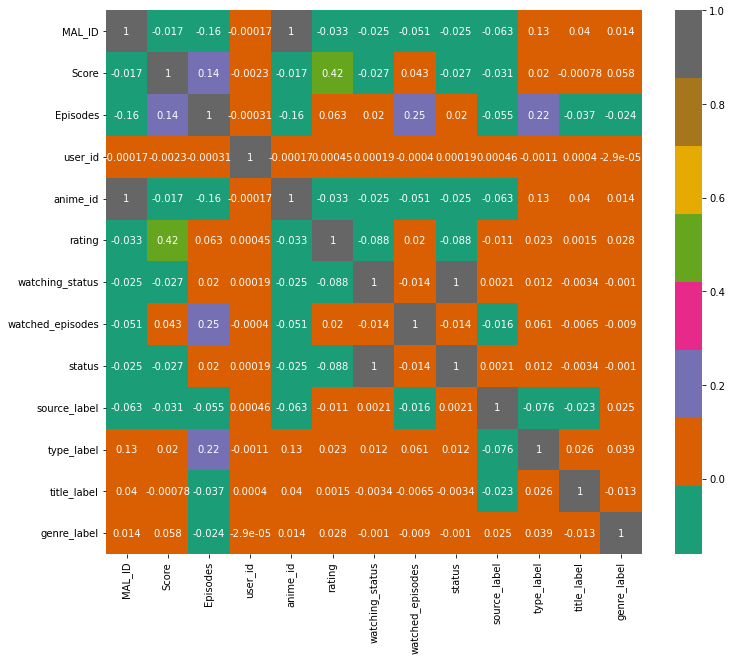

In [45]:
#plot de correção de variaveis
plt.figure(figsize=(12,10))
cor = animetotaldf.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Dark2)
plt.show()

sb.distplot(animetotaldf['rating'], color="orange")

In [97]:
animetotaldf['Score'].head(200)

11      8.78
12      8.78
18      8.78
19      8.78
37      8.78
        ... 
2304    8.78
2306    8.78
2310    8.78
2328    8.78
2331    8.78
Name: Score, Length: 200, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Score', ylabel='Density'>

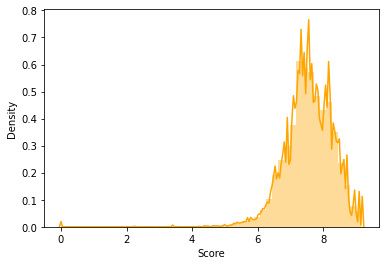

In [99]:
#plot grafico da distribuição de score (densidade)
sb.distplot(animetotaldf['Score'], color="orange")

In [90]:
#Eliminação de outlier - reajuste da variavel de rating baseado no cenário identificado anteriormente, eliminando outliers.
animetotaldf['rating_new'] = np.where(animetotaldf['rating'] >= 6.0, '1', '0')

In [91]:
#Tratamento dos dados, semparando em dados de treino, teste e validação, com sable de 600.000 registros. 
anime_sample = animetotaldf.sample(n=600000, random_state=1)
features = anime_sample[['status','source_label','type_label','title_label','genre_label']].copy()
labels = anime_sample['rating_new']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=45)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=45)

In [92]:
animetotaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259842038 entries, 11 to 475053937
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MAL_ID            int64  
 1   Name              object 
 2   Score             float64
 3   Episodes          float64
 4   Genres            object 
 5   Source            object 
 6   Type              object 
 7   Studios           object 
 8   Genero_Explode    object 
 9   user_id           int64  
 10  anime_id          int64  
 11  rating            int64  
 12  watching_status   int64  
 13  watched_episodes  float64
 14  status            int64  
 15   description      object 
 16  source_label      int32  
 17  type_label        int32  
 18  title_label       int32  
 19  genre_label       int32  
 20  rating_bracket    object 
 21  rating_new        object 
dtypes: float64(3), int32(4), int64(6), object(9)
memory usage: 40.7+ GB


In [49]:
#Aplicação do modelo classificador RandomForest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20)
rf_model.fit(X_train, y_train)
rf_predicted_values = rf_model.predict(X_test)
score = accuracy_score(y_test,rf_predicted_values)

print(score)

0.89765


In [50]:
#Aplicação do modelo classificador Decision Tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predicted_values = dt_model.predict(X_test)
score = accuracy_score(y_test,rf_predicted_values)

print(score)

0.89765


In [51]:
#Aplicação do modelo classificador KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predicted_values = knn_model.predict(X_test)
score = accuracy_score(y_test,knn_predicted_values)

print(score)

0.888975


In [52]:
#Aplicação do modelo classificador Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_predicted_values = gnb_model.predict(X_test)
score = accuracy_score(y_test,gnb_predicted_values)

print(score)

0.8846666666666667


In [53]:
#Aplicação do modelo classificador Linear Discriminant Analysis (Análise Discriminante Linear)
lin_model = LinearDiscriminantAnalysis()
lin_model.fit(X_train, y_train)
lin_predicted_values = lin_model.predict(X_test)
score = accuracy_score(y_test,lin_predicted_values)

print(score)

0.8982583333333334


In [54]:
#Aplicação do modelo classificador Support Vector Machine (Máquina de vetores de suporte)
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predicted_values = svc_model.predict(X_test)
score = accuracy_score(y_test,svc_predicted_values)

print(score)

0.8980833333333333


In [55]:
#Aplicação do modelo classificador Multilayer Perceptro (Perceptron Multicamadas)
MLP_model = MLPClassifier()
MLP_model.fit(X_train, y_train)
MLP_predicted_values = MLP_model.predict(X_test)
score = accuracy_score(y_test,MLP_predicted_values)

print(score)

0.8980833333333333


In [56]:
MLP_model = MLPClassifier(solver='sgd')
parameters = {
 'hidden_layer_sizes': [(10,), (50,)], 
 'activation': ['relu', 'logistic']
}
MLP_model.fit(X_train, y_train)
MLP_predicted_values = MLP_model.predict(X_test)
score = accuracy_score(y_test,MLP_predicted_values)

print(score)

0.8980833333333333


In [ ]:
#Resultado dos testes aplicados - Random Forest
print(metrics.classification_report(rf_predicted_values, y_test))

In [65]:
#Resultado dos testes aplicados - KNN
print(metrics.classification_report(knn_predicted_values, y_test))

              precision    recall  f1-score   support

           0       0.07      0.31      0.12      2845
           1       0.98      0.90      0.94    117155

    accuracy                           0.89    120000
   macro avg       0.53      0.61      0.53    120000
weighted avg       0.96      0.89      0.92    120000



In [66]:
#Resultado dos testes aplicados - Decision Tree
print(metrics.classification_report(dt_predicted_values, y_test))

              precision    recall  f1-score   support

           0       0.10      0.36      0.16      3449
           1       0.98      0.91      0.94    116551

    accuracy                           0.89    120000
   macro avg       0.54      0.63      0.55    120000
weighted avg       0.95      0.89      0.92    120000



In [67]:
#Resultado dos testes aplicados - Bayes
print(metrics.classification_report(gnb_predicted_values, y_test))

              precision    recall  f1-score   support

           0       0.04      0.19      0.07      2624
           1       0.98      0.90      0.94    117376

    accuracy                           0.88    120000
   macro avg       0.51      0.55      0.50    120000
weighted avg       0.96      0.88      0.92    120000



In [68]:
#Resultado dos testes aplicados - Linear Discriminant Analysis 
print(metrics.classification_report(lin_predicted_values, y_test))

              precision    recall  f1-score   support

           0       0.03      0.51      0.06       743
           1       1.00      0.90      0.95    119257

    accuracy                           0.90    120000
   macro avg       0.51      0.71      0.50    120000
weighted avg       0.99      0.90      0.94    120000



In [69]:
#Resultado dos testes aplicados - SVM
print(metrics.classification_report(svc_predicted_values, y_test,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.90      0.95    120000

    accuracy                           0.90    120000
   macro avg       0.50      0.45      0.47    120000
weighted avg       1.00      0.90      0.95    120000



In [70]:
#Resultado dos testes aplicados - MLP
print(metrics.classification_report(MLP_predicted_values, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.90      0.95    120000

    accuracy                           0.90    120000
   macro avg       0.50      0.45      0.47    120000
weighted avg       1.00      0.90      0.95    120000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
#Resultado dos testes aplicados - 
print(metrics.classification_report(MLP_predicted_values, y_test,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.90      0.95    120000

    accuracy                           0.90    120000
   macro avg       0.50      0.45      0.47    120000
weighted avg       1.00      0.90      0.95    120000



In [75]:
import collections
from collections import Counter
import matplotlib.pyplot as plt
import statistics

In [76]:
animetotaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259842038 entries, 11 to 475053937
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MAL_ID            int64  
 1   Name              object 
 2   Score             float64
 3   Episodes          float64
 4   Genres            object 
 5   Source            object 
 6   Type              object 
 7   Studios           object 
 8   Genero_Explode    object 
 9   user_id           int64  
 10  anime_id          int64  
 11  rating            int64  
 12  watching_status   int64  
 13  watched_episodes  float64
 14  status            int64  
 15   description      object 
 16  source_label      int32  
 17  type_label        int32  
 18  title_label       int32  
 19  genre_label       int32  
 20  rating_bracket    object 
dtypes: float64(3), int32(4), int64(6), object(8)
memory usage: 38.7+ GB


In [77]:
animecompletogenerodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50254 entries, 0 to 17561
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MAL_ID          50254 non-null  int64 
 1   Name            50254 non-null  object
 2   Score           50254 non-null  object
 3   Episodes        50254 non-null  object
 4   Genres          50254 non-null  object
 5   Source          50254 non-null  object
 6   Type            50254 non-null  object
 7   Studios         50254 non-null  object
 8   Genero_Explode  50254 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.8+ MB


In [78]:
#Exploração dos dados - Todos os Gêneros disponiveis
animecompletogenerodf['Genero_Explode'].unique()

array(['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space',
       'Mystery', 'Shounen', 'Police', 'Supernatural', 'Magic', 'Fantasy',
       'Sports', 'Josei', 'Romance', 'Slice of Life', 'Cars', 'Seinen',
       'Horror', 'Psychological', 'Thriller', 'Super Power',
       'Martial Arts', 'School', 'Ecchi', 'Vampire', 'Military',
       'Historical', 'Dementia', 'Mecha', 'Demons', 'Samurai', 'Game',
       'Shoujo', 'Harem', 'Music', 'Shoujo Ai', 'Shounen Ai', 'Kids',
       'Hentai', 'Parody', 'Yuri', 'Yaoi', 'Unknown'], dtype=object)

In [79]:
len(animecompletogenerodf['Genero_Explode'].unique())

44

In [80]:
#Exploração dos Dados - Total de animações por gênero
generosdf = Counter(animecompletogenerodf['Genero_Explode'])
sorted(generosdf.items(), key=lambda item: item[1],reverse=True  )

[('Comedy', 6029),
 ('Action', 3887),
 ('Fantasy', 3285),
 ('Adventure', 2957),
 ('Kids', 2665),
 ('Drama', 2619),
 ('Sci-Fi', 2582),
 ('Music', 2243),
 ('Shounen', 2003),
 ('Slice of Life', 1914),
 ('Romance', 1899),
 ('School', 1642),
 ('Supernatural', 1479),
 ('Hentai', 1348),
 ('Historical', 1144),
 ('Mecha', 1100),
 ('Magic', 1081),
 ('Seinen', 829),
 ('Ecchi', 767),
 ('Mystery', 727),
 ('Sports', 713),
 ('Shoujo', 688),
 ('Parody', 660),
 ('Super Power', 632),
 ('Military', 575),
 ('Dementia', 512),
 ('Demons', 501),
 ('Space', 495),
 ('Horror', 462),
 ('Martial Arts', 425),
 ('Harem', 399),
 ('Game', 386),
 ('Psychological', 345),
 ('Police', 246),
 ('Samurai', 202),
 ('Vampire', 136),
 ('Cars', 133),
 ('Thriller', 131),
 ('Shounen Ai', 100),
 ('Josei', 97),
 ('Shoujo Ai', 79),
 ('Unknown', 63),
 ('Yaoi', 42),
 ('Yuri', 32)]

In [81]:
animecompletogenerodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50254 entries, 0 to 17561
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MAL_ID          50254 non-null  int64 
 1   Name            50254 non-null  object
 2   Score           50254 non-null  object
 3   Episodes        50254 non-null  object
 4   Genres          50254 non-null  object
 5   Source          50254 non-null  object
 6   Type            50254 non-null  object
 7   Studios         50254 non-null  object
 8   Genero_Explode  50254 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.8+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17560 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17560 non-null  int64 
 1   Name           17560 non-null  object
 2   Score          17560 non-null  object
 3   Genres         17560 non-null  object
 4   English name   17560 non-null  object
 5   Japanese name  17560 non-null  object
 6   Type           17560 non-null  object
 7   Episodes       17560 non-null  object
 8   Aired          17560 non-null  object
 9   Premiered      17560 non-null  object
 10  Producers      17560 non-null  object
 11  Licensors      17560 non-null  object
 12  Studios        17560 non-null  object
 13  Source         17560 non-null  object
 14  Duration       17560 non-null  object
 15  Rating         17560 non-null  object
 16  Ranked         17560 non-null  object
 17  Popularity     17560 non-null  int64 
 18  Members        17560 non-n

In [85]:
animecompletodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17560 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17560 non-null  int64 
 1   Name           17560 non-null  object
 2   Score          17560 non-null  object
 3   Genres         17560 non-null  object
 4   English name   17560 non-null  object
 5   Japanese name  17560 non-null  object
 6   Type           17560 non-null  object
 7   Episodes       17560 non-null  object
 8   Aired          17560 non-null  object
 9   Premiered      17560 non-null  object
 10  Producers      17560 non-null  object
 11  Licensors      17560 non-null  object
 12  Studios        17560 non-null  object
 13  Source         17560 non-null  object
 14  Duration       17560 non-null  object
 15  Rating         17560 non-null  object
 16  Ranked         17560 non-null  object
 17  Popularity     17560 non-null  int64 
 18  Members        17560 non-n

4.604823462414578

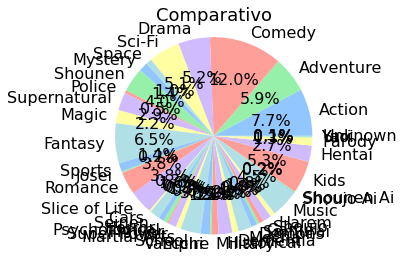

AttributeError: 'int' object has no attribute 'value_counts'

In [ ]:
animecompletogenerodf['Genero_Explode'].value_counts().sort_index().plot.bar(figsize=(15, 5), title='Gêneros')

In [ ]:
generosdf.info()

In [ ]:
sorted(generosdf.items(), key=lambda item: item[1],reverse=True  )
#generosdf.sort_values('Genero_Explode').head()

In [ ]:
w = collections.Counter(generosdf)
plt.bar(w.keys(), w.values())

In [ ]:
#Matriz de confusão - Análise de classificadores
cmrf = metrics.confusion_matrix(rf_predicted_values, y_test)
cmdt = metrics.confusion_matrix(dt_predicted_values, y_test)
cmknn = metrics.confusion_matrix(knn_predicted_values, y_test)
cmmlp = metrics.confusion_matrix(MLP_predicted_values, y_test)
cmlin = metrics.confusion_matrix(lin_predicted_values, y_test)
cmgnb = metrics.confusion_matrix(gnb_predicted_values, y_test)

In [ ]:
#plt.figure(figsize = (20,20))
#sb.heatmap(cm, annot=True)

In [ ]:
#Análise de cenário de classificador através da matriz de confusão - Random Forest
sb.heatmap(cmrf/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
#Análise de cenário de classificador através da matriz de confusão - Decision Tree
sb.heatmap(cmdt/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
#Análise de cenário de classificador através da matriz de confusão - KNN
sb.heatmap(cmknn/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
#Análise de cenário de classificador através da matriz de confusão - MLP
sb.heatmap(cmmlp/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
#Análise de cenário de classificador através da matriz de confusão - LIN
sb.heatmap(cmlin/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
#Análise de cenário de classificador através da matriz de confusão - GNB - Bayes
sb.heatmap(cmgnb/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
#Heatmap com rótulos
rotulos = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
rotulos = np.asarray(rotulos).reshape(2,2)
sb.heatmap(cmrf, annot=rotulos, fmt='', cmap='Blues')